In [1]:
from statsmodels.formula.api import ols # 多项式回归
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

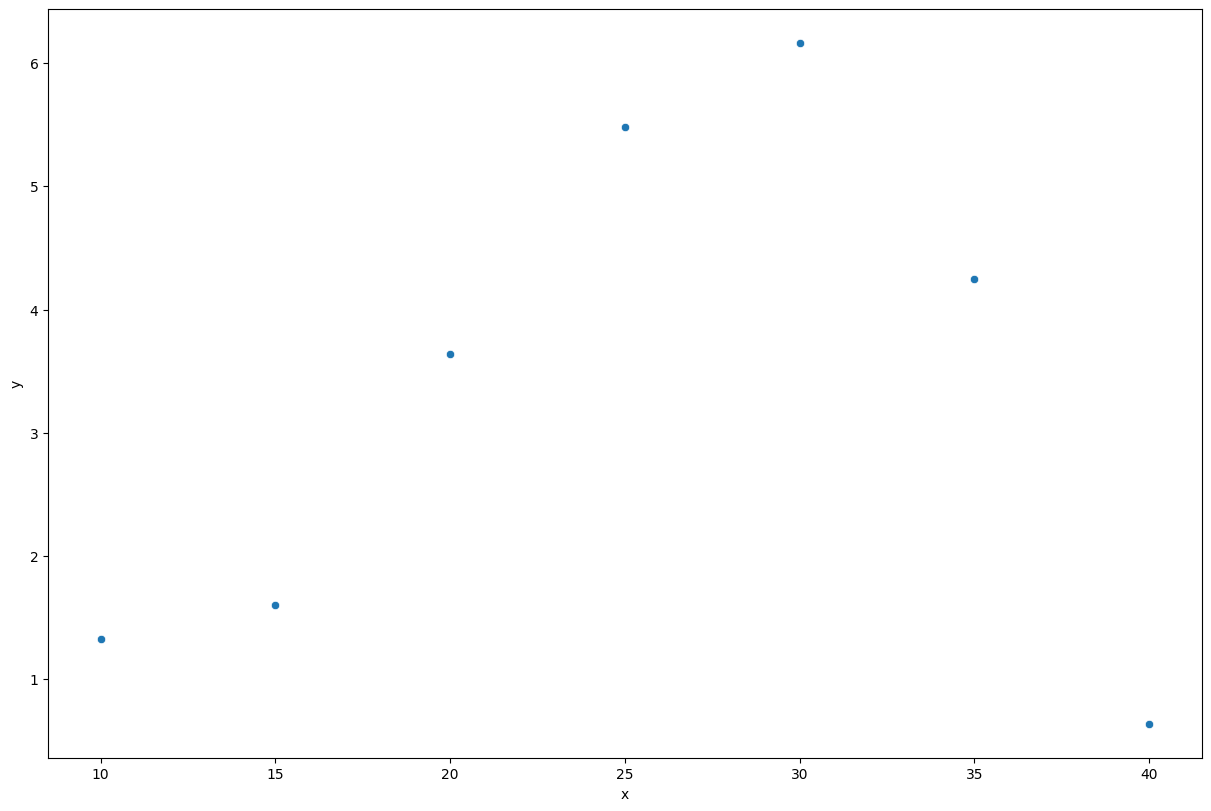

In [2]:
# 加载数据
polyreg = pd.read_csv('polyreg.csv')
x = polyreg['x']
y = polyreg['y']
# 绘制散点图
fig,ax = plt.subplots(figsize=(12, 8), layout='constrained')

sns.scatterplot(x='x',
            y='y',
            ax = ax, 
            data=polyreg)

# 显示图形
plt.show()

In [3]:
# 二次多项式模型：y ~ x + I(x**2)
model = ols('y ~ x + I(x**2) + I(x**3) + I(x**4)', data=polyreg).fit()
print(model.summary()) # 输出摘要

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     345.6
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00289
Time:                        23:04:43   Log-Likelihood:                 8.1300
No. Observations:                   7   AIC:                            -6.260
Df Residuals:                       2   BIC:                            -6.530
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.0157      2.800      6.435      0.0

e:\Python\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [4]:
# print(model.params) # 输出参数
value = model.params
print(f'函数y = {value.iloc[0]} + {value.iloc[1]}x + \
      {value.iloc[2]}x^2 + {value.iloc[3]}x^3 + {value.iloc[4]}x^4')

函数y = 18.01571428399931 + -3.5252821067093185x +       0.24047575757449918x^2 + -0.005932525252569008x^3 + 4.630303030396654e-05x^4


In [5]:
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = value.iloc[0]+\
        value.iloc[1]*x_fit+\
        value.iloc[2]*x_fit**2+\
        value.iloc[3]*x_fit**3+\
        value.iloc[4]*x_fit**4

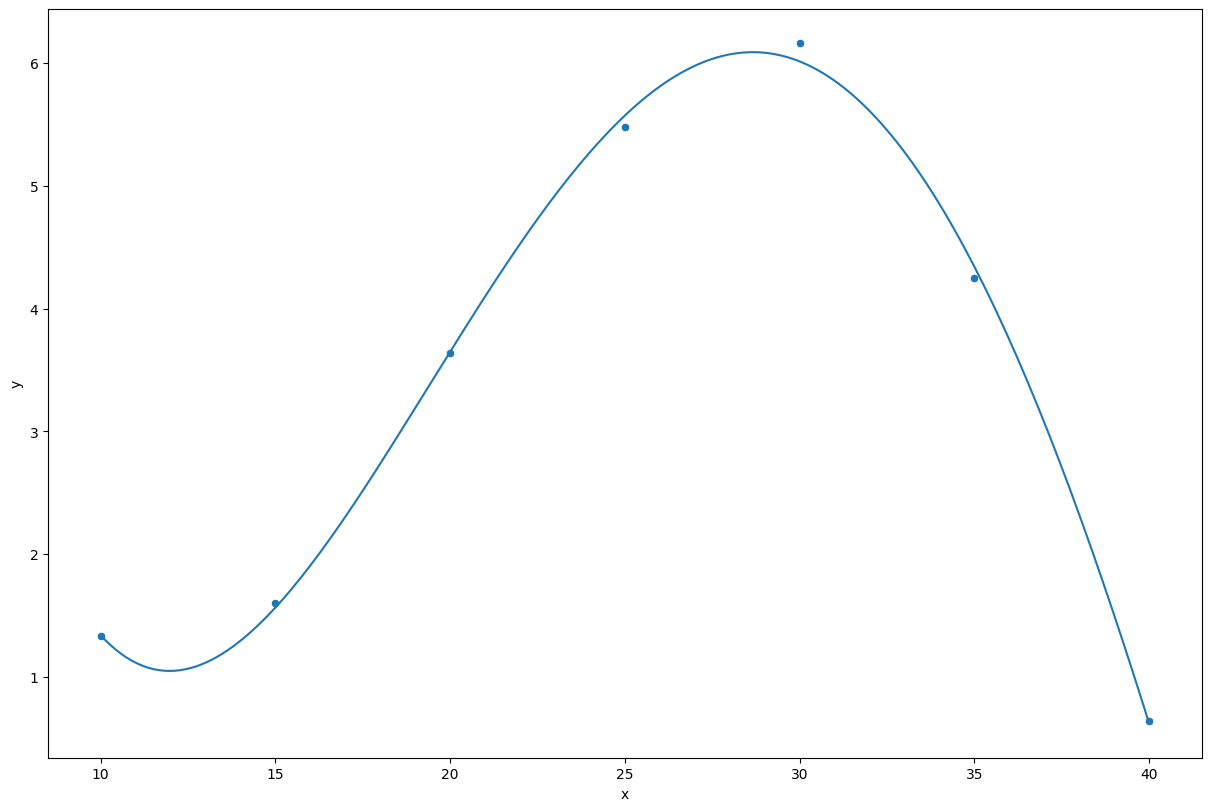

In [6]:
# 可视化结果
fig,ax = plt.subplots(figsize=(12, 8), layout='constrained')
sns.scatterplot(x='x',
            y='y',
            ax = ax, 
            data=polyreg)
sns.lineplot(x=x_fit,
            y=y_fit,
            ax = ax)
plt.show()